In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [9]:
dfAge = pd.read_csv('Data2/By Age 2015 - 2020.csv', dtype={'No of Arrivals': 'int', 'Year': 'int'})
dfIncome = pd.read_csv('Data2/By Annual Income Group(2019-2020).csv', dtype={'No of Arrival per Annual Income': 'int', 'Year': 'int'})
dfFreq = pd.read_csv('Data2/By Frequency of purpose(2015- 2020).csv', dtype={'No of Arrival by Frequency of purpose': 'int', 'Year': 'int'})
dfTransport = pd.read_csv('Data2/By mode of transport(2015-2020).csv')
dfOccupation = pd.read_csv('Data2/By Occupation(2015-2020).csv')
dfSex = pd.read_csv('Data2/By Sex 2015 - 2020.csv')
dfQuart = pd.read_csv('Data2/TourismArrival2020-2021(Quarterly).csv')
dfList = [dfAge, dfIncome, dfFreq, dfTransport, dfOccupation, dfSex, dfQuart]
nameList = ['Age', 'Income', 'Freq', 'Transport', 'Occupation', 'Sex', 'Arrival']
# type(dfQuart)

## preprocess

In [10]:
for i, df in enumerate(dfList):
    # for temp in toChange:
    #     try:
    #         df[temp] = df[temp].str.replace(",", "")
    #         df[temp] = pd.to_numeric(df[temp], errors="coerce")
    #     except:
    #         continue
    dfList[i] = df
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(f"total missing : {total_missing}")
    print(f"type : {df.dtypes}")
    print('-----------------------------')



total missing : 0
type : Region      object
Country     object
Age         object
Arrivals     int64
Year         int32
dtype: object
-----------------------------
total missing : 0
type : Country     object
Income      object
Arrivals     int64
Year         int32
dtype: object
-----------------------------
total missing : 0
type : Country      object
Frequency    object
Arrivals      int64
Year          int32
dtype: object
-----------------------------
total missing : 0
type : Country      object
Transport    object
Year          int64
Arrivals      int64
dtype: object
-----------------------------
total missing : 0
type : Country       object
Year           int64
Arrivals       int64
Occupation    object
dtype: object
-----------------------------
total missing : 0
type : Year         int64
Arrivals     int64
Sex         object
Country     object
dtype: object
-----------------------------
total missing : 0
type : Country                object
Arrivals                int64
Stay(Days)

In [11]:
# numecalize
contentsDict = {}
for i, df in enumerate(dfList):
    name = nameList[i]
    columns = df.columns.tolist()
    temp2 = {}
    for column in columns:
        if df[column].dtype != object:
            print(column)
            continue
        temp = df[column].unique()
        AnyToNum = {}
        NumToAny = {}
        for j, item in enumerate(temp, start=1):
            NumToAny[j] = item
            AnyToNum[item] = j
        def converter(item):
            return AnyToNum.get(item, np.nan)
        df[column] = df[column].apply(converter)
        
        temp2[column] = [NumToAny, AnyToNum]
    contentsDict[name] = temp2


Arrivals
Year
Arrivals
Year
Arrivals
Year
Year
Arrivals
Year
Arrivals
Year
Arrivals
Arrivals
Stay(Days)
Spending($US/Day)
Receipts(Mil. $US)


In [12]:
contentsDict

{'Age': {'Region': [{1: 'South-East Asia',
    2: 'North-East Asia',
    3: 'Asia',
    4: 'Western Europe',
    5: 'Nothern Europe',
    6: 'Europe',
    7: 'Southern/Medit. Europe',
    8: 'Northern Europe',
    9: 'Central/Eastern Europe',
    10: 'East Europe',
    11: 'America',
    12: 'South Asia',
    13: 'Oceania',
    14: 'Middle East',
    15: 'Africa'},
   {'South-East Asia': 1,
    'North-East Asia': 2,
    'Asia': 3,
    'Western Europe': 4,
    'Nothern Europe': 5,
    'Europe': 6,
    'Southern/Medit. Europe': 7,
    'Northern Europe': 8,
    'Central/Eastern Europe': 9,
    'East Europe': 10,
    'America': 11,
    'South Asia': 12,
    'Oceania': 13,
    'Middle East': 14,
    'Africa': 15}],
  'Country': [{1: 'Brunai',
    2: 'Cambodia',
    3: 'Indonesia',
    4: 'Laos',
    5: 'Malaysia',
    6: 'Myanmar',
    7: 'Philippines',
    8: 'Singapore',
    9: 'Vietnam',
    10: 'China',
    11: 'Hong Kong',
    12: 'Japan',
    13: 'Korea',
    14: 'Taiwan',
    15: 'Ot

## EDA (Rachel requested)

<Axes: >

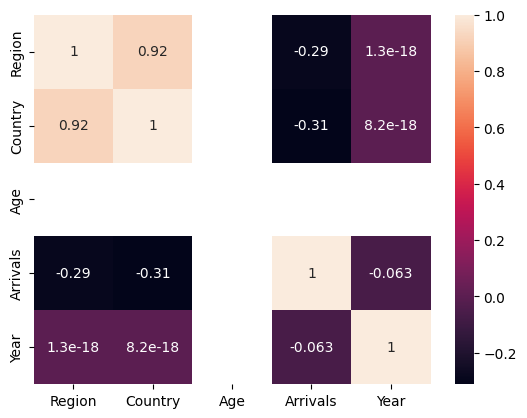

In [26]:
import seaborn as sns

# {'Total': 1,
#     'Under 25': 2,
#     '25 - 34': 3,
#     '35 - 44': 4,
#     '45 - 54': 5,
#     '55 - 64': 6,
#     '65 and Over': 7}

dfAge2 = dfList[0]

sns.heatmap(dfAge2[dfList[0]['Age'] == 1].corr(), annot=True)

<Axes: >

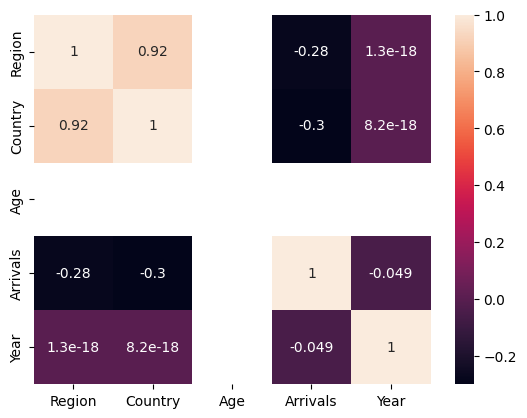

In [27]:
sns.heatmap(dfAge2[dfList[0]['Age'] == 2].corr(), annot=True)

<Axes: >

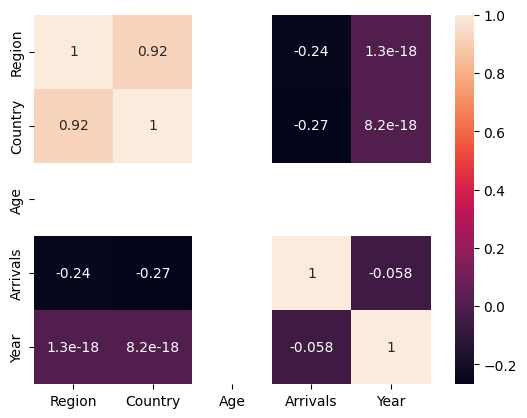

In [28]:
sns.heatmap(dfAge2[dfList[0]['Age'] == 3].corr(), annot=True)

<Axes: >

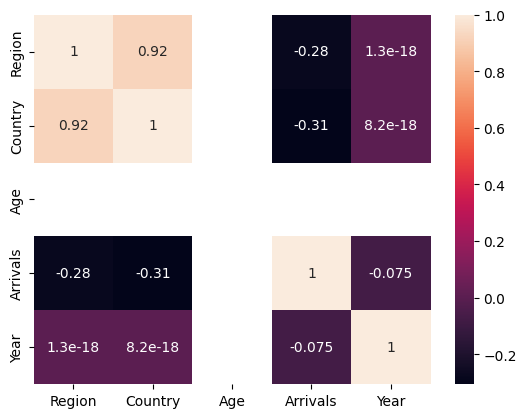

In [29]:
sns.heatmap(dfAge2[dfList[0]['Age'] == 4].corr(), annot=True)

<Axes: >

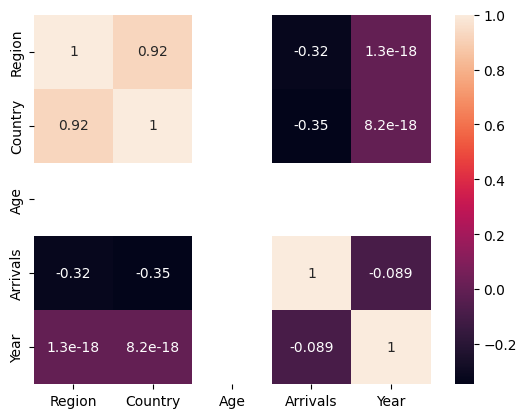

In [30]:
sns.heatmap(dfAge2[dfList[0]['Age'] == 5].corr(), annot=True)

<Axes: >

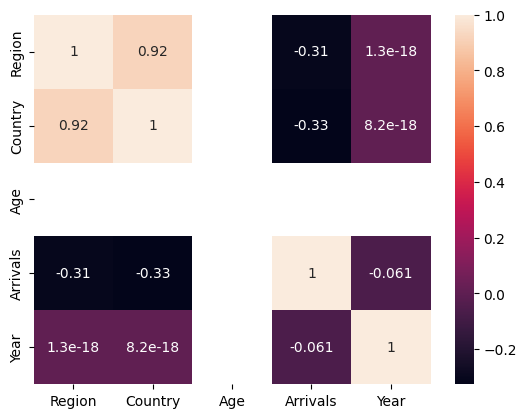

In [31]:
sns.heatmap(dfAge2[dfList[0]['Age'] == 6].corr(), annot=True)

## (useless) EDA

In [14]:
import seaborn as sns

<Axes: >

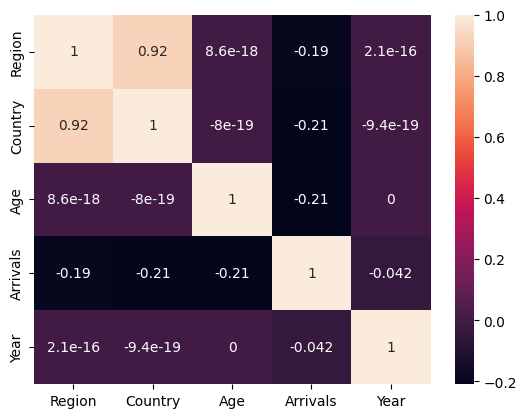

In [15]:
sns.heatmap(dfList[0].corr(), annot=True)

<Axes: >

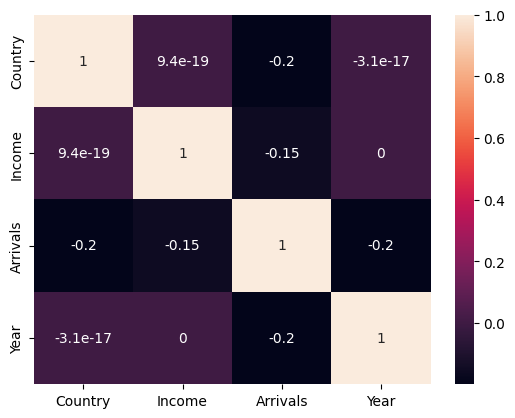

In [16]:
sns.heatmap(dfList[1].corr(), annot=True)

<Axes: >

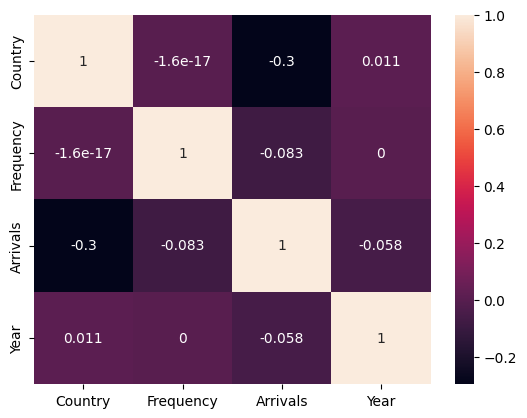

In [17]:
sns.heatmap(dfList[2].corr(), annot=True)

<Axes: >

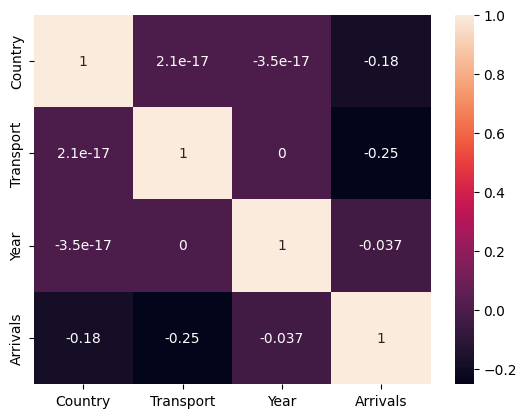

In [18]:
sns.heatmap(dfList[3].corr(), annot=True)

<Axes: >

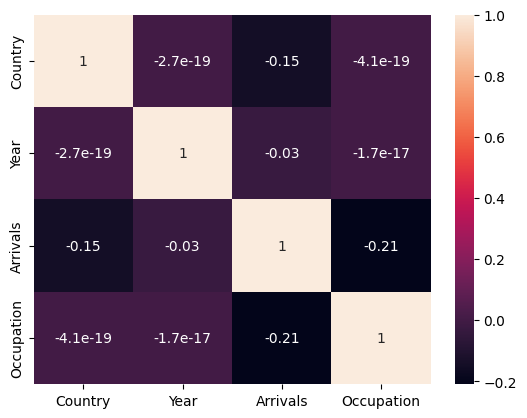

In [19]:
sns.heatmap(dfList[4].corr(), annot=True)

<Axes: >

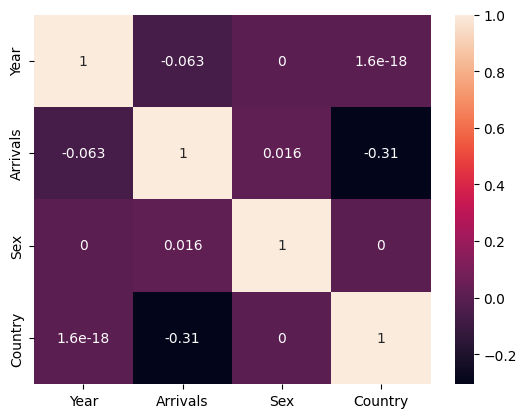

In [20]:
sns.heatmap(dfList[5].corr(), annot=True)

<Axes: >

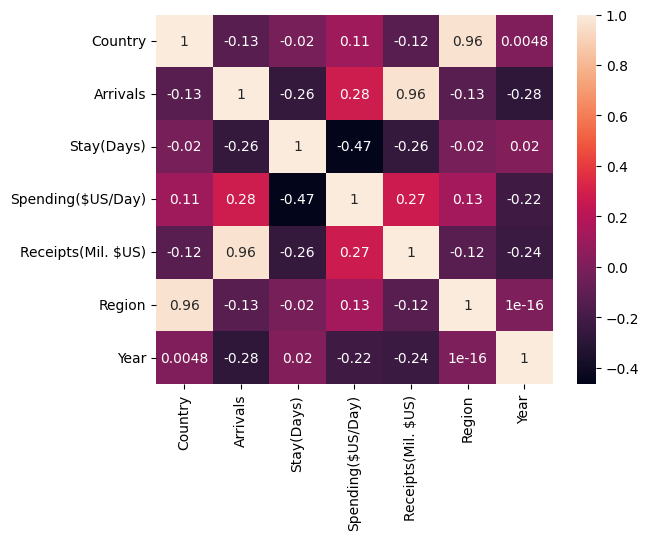

In [21]:
sns.heatmap(dfList[6].corr(), annot=True)

## Model

In [22]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(2, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

testDf = {}
Models = {}

for i, df in enumerate(dfList):
    # split
    name = nameList[i]
    columns = df.columns.tolist()
    columns.remove('Arrivals')
    X = df[columns]
    y = df['Arrivals']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # test data preparation
    X_test_list = []
    y_test_list = y_test.tolist()
    for row in X_test.iterrows():
        item = []
        for j in range(len(columns)):
            item.append(row[1][j])
        X_test_list.append(item)
    data = [X_test_list, y_test_list]
    testDf[nameList[i]]=data

    # create model
    LRModel = LinearRegression()
    LRModel.fit(X, y)

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])
    X_poly = poly.fit_transform(X)
    PRModel = LinearRegression()
    PRModel.fit(X_poly, y)
    data = [LRModel, PRModel, grid_search.best_params_['poly_features__degree']]
    print(data)
    Models[nameList[i]]=data
    


KeyboardInterrupt: 

In [ ]:
testDf['Age'][1]

[253622,
 4832,
 287199,
 49739,
 9548,
 71900,
 96193,
 23416,
 12405,
 13493,
 130200,
 1854,
 749,
 28621,
 775,
 285029,
 53814,
 3435,
 7466,
 23175,
 112719,
 131255,
 50667,
 4344,
 11105,
 6960,
 453,
 1569,
 162242,
 62697,
 36676,
 69683,
 10165,
 11864,
 56146,
 20835,
 786,
 21107,
 51240,
 10251,
 261814,
 23971,
 3111,
 156409,
 131988,
 4210,
 129995,
 144081,
 1404,
 40577,
 18470,
 56872,
 863807,
 317797,
 156656,
 132406,
 8442,
 6119,
 99670,
 71666,
 11272,
 425900,
 31750,
 26694,
 12859,
 63883,
 12475,
 2386,
 279451,
 56019,
 137933,
 97277,
 161412,
 281,
 174815,
 43216,
 13419,
 7098,
 3719,
 128603,
 46362,
 26303,
 420795,
 1893,
 586,
 9942,
 2139,
 1450,
 21670,
 270407,
 925437,
 15519,
 24052,
 19643,
 14774,
 26499,
 29742,
 799,
 219967,
 24361,
 34519,
 37329,
 94878,
 1166,
 16638,
 889,
 206087,
 9968,
 4901,
 746135,
 8202,
 92631,
 20170,
 19858,
 99402,
 47080,
 7861,
 8478,
 756939,
 140712,
 12596,
 178954,
 137374,
 47537,
 24469,
 15844,
 2

In [ ]:
Models

{'Age': [LinearRegression(), LinearRegression(), 2],
 'Income': [LinearRegression(), LinearRegression(), 2],
 'Freq': [LinearRegression(), LinearRegression(), 8],
 'Transport': [LinearRegression(), LinearRegression(), 2],
 'Occupation': [LinearRegression(), LinearRegression(), 7],
 'Sex': [LinearRegression(), LinearRegression(), 2],
 'Arrival': [LinearRegression(), LinearRegression(), 3]}

## Evaluation

In [ ]:

result = {}
for i, name in enumerate(nameList):

    LRModel = Models[name][0]
    PRModel = Models[name][1]
    LRPreds = []
    PRPreds = []
    testVals = testDf[name][0]
    ansVal = testDf[name][1]

    poly = PolynomialFeatures(degree=Models[name][2])

    for i, testVal in enumerate(testVals):
        
        x_pred_LR = np.array([testVal])
        # x_pred_LR = LRModel.predict(testVal2)
        LRPreds.append(LRModel.predict(x_pred_LR))
        
        x_pred_PR = np.array([testVal])
        x_pred_PR = poly.fit_transform(x_pred_PR)
        
        # x_pred_PR = PRModel.fit_transform(x_pred_PR)
        PRPreds.append(PRModel.predict(x_pred_PR))

        # mse = mean_squared_error(testData[1], testPred)
    LR_r2 = r2_score(ansVal, LRPreds)
    PR_r2 = r2_score(ansVal, PRPreds)
    # print(i)
    # print(LR_r2)
    # print(PR_r2)
    result[name] = [LR_r2, PR_r2]


454
454
454
87
87
87
195
195
195
195
195
195
778
778
778


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

130
130
130
85
85
85


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

In [ ]:
result

{'Age': [0.09596776134212082, 0.150460607249149],
 'Income': [0.07003489318359901, -0.08924573061715013],
 'Freq': [0.06456358106609261, 0.18233663685952084],
 'Transport': [0.125571760105197, 0.14793499755954542],
 'Occupation': [0.05719547663038005, 0.2684184290890823],
 'Sex': [0.1177457597649364, 0.12157860300742662],
 'Arrival': [0.6029627444340275, 0.9673502731926986]}

In [ ]:
AgeModel = Models[nameList[0]][1]
IncomeModel = Models[nameList[1]][1]
FreqModel = Models[nameList[2]][1]
TransportModel = Models[nameList[3]][1]
OccupationModel = Models[nameList[4]][1]
GenderModel = Models[nameList[5]][1]
ArrialModel = Models[nameList[6]][1]

NewModels = [AgeModel, IncomeModel, FreqModel, TransportModel, OccupationModel, GenderModel, ArrialModel]

In [ ]:
NewModels[0]

LinearRegression()

## ensemble learning

In [ ]:
def predByAge(Region, Country, Age, Year):
    # numecallize input
    inputs = [
        contentsDict['Age']['Region'][1][Region],
        contentsDict['Age']['Country'][1][Country],
        contentsDict['Age']['Age'][1][Age],
        Year
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Age'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[0].predict(x_pred))


def predByIncome(Country, Income, Year):
    # numecallize input
    inputs = [
        contentsDict['Income']['Country'][1][Country],
        contentsDict['Income']['Income'][1][Income],
        Year
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Income'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[1].predict(x_pred))


def predByFreq(Country, Frequency, Year):
    # numecallize input
    inputs = [
        contentsDict['Freq']['Country'][1][Country],
        contentsDict['Freq']['Frequency'][1][Frequency],
        Year
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Freq'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[2].predict(x_pred))


def predByTransport(Country, Transport, Year):
    # numecallize input
    inputs = [
        contentsDict['Transport']['Country'][1][Country],
        contentsDict['Transport']['Transport'][1][Transport],
        Year
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Transport'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[3].predict(x_pred))


def predByOccu(Country, Year, Occupation):
    # numecallize input
    inputs = [
        contentsDict['Occupation']['Country'][1][Country],
        Year,
        contentsDict['Occupation']['Occupation'][1][Occupation]
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Occupation'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[4].predict(x_pred))


def predBySex(Year, Sex, Country):
    # numecallize input
    inputs = [
        Year,
        contentsDict['Sex']['Sex'][1][Sex],
        contentsDict['Sex']['Country'][1][Country]
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Sex'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[5].predict(x_pred))


def predByRand(Country, StayDays, Spending, Receipts, Region, Year):
    # numecallize input
    inputs = [
        contentsDict['Arrival']['Country'][1][Country],
        StayDays,
        Spending,
        Receipts,
        contentsDict['Arrival']['Region'][1][Region],
        contentsDict['Arrival']['Year'][1][Year]
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=Models['Arrival'][2])
    x_pred = poly.fit_transform(x_pred)
    return(NewModels[6].predict(x_pred))

In [ ]:
Region = 'South-East Asia'
Country = 'Brunai'
Age = '35 - 44'
Year = 2015
Income = 'Less than 20,000 US$'
Freq = 'Total'
Trans = 'Air'
Occu = 'Professional'
Sex = 'Male'
StayDays = 9.48
Spending = 7147.43
Receipts = 164.99
Region2 = 'Asean'
Country2 = 'Brunei'
Year2 = 'Q1/2020'

In [ ]:
# contentsDict['']

In [ ]:
total = 0
Weights = []
for i, name in enumerate(nameList):
    total += result[name][1]

for i, name in enumerate(nameList):
    Weights.append(result[name][1]/total)


def ensemble_learning(a, b, c, d, e, f, g, weights):
    y_pred = np.dot(weights, [a, b, c, d, e, f, g])
    return y_pred


Weights2 = [0.1, 0.05, 0.05, 0.1, 0.1, 0.1, 0.5]
print(Weights)
print(Weights2)
ensemble_learning(
    predByAge(Region, Country, Age, Year),
    predByIncome(Country, Income, Year),
    predByFreq(Country, Freq, Year),
    predByTransport(Country, Trans, Year),
    predByOccu(Country, Year, Occu),
    predBySex(Year, Sex, Country),
    predByRand(Country2, StayDays, Spending, Receipts, Region2, Year2),
    Weights2
    )


[0.08603482265914379, -0.05103156731261736, 0.10426184303840302, 0.08459065474221225, 0.153484239943846, 0.06951981478826284, 0.5531401921407495]
[0.1, 0.05, 0.05, 0.1, 0.1, 0.1, 0.5]


array([281032.27956781])

In [ ]:
contentsDict['Arrival']['Year'][1]

{'Q1/2020': 1,
 'Q2/2020': 2,
 'Q3/2020': 3,
 'Q4/2020': 4,
 'Q1/2021': 5,
 'Q2/2021': 6,
 'Q3/2021': 7,
 'Q4/2021': 8}